Import Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import textwrap
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Utilize the (10)Dataset Text Document Classification and create a DataFrame containing the text column and label column

In [3]:
# /content/drive/MyDrive/(10)Dataset Text Document Classification


# Define the root directory where your folders are located
root_dir = '/content/drive/MyDrive/(10)Dataset Text Document Classification'

# Initialize empty lists to store text and labels
texts = []
labels = []

# Iterate through each folder in the root directory
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)

    # Check if the item in the root directory is a folder
    if os.path.isdir(folder_path):
        # Iterate through each file in the folder
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)

            # Read the content of the file
            with open(file_path, 'r', encoding='utf-8') as f:
                text = f.read()

            # Append text and label to the lists
            texts.append(text)
            labels.append(folder)

# Create pandas DataFrame
df = pd.DataFrame({'text': texts, 'label': labels})

In [4]:
df.head()

,text,label
0,Chepkemei hit by big ban\n\nKenya's athletics ...,sport
1,El Guerrouj targets cross country\n\nDouble Ol...,sport
2,Gebrselassie in London triple bid\n\nDouble Ol...,sport
3,McIlroy continues winning streak\n\nJames McIl...,sport
4,GB select Holmes for double bid\n\nKelly Holme...,sport


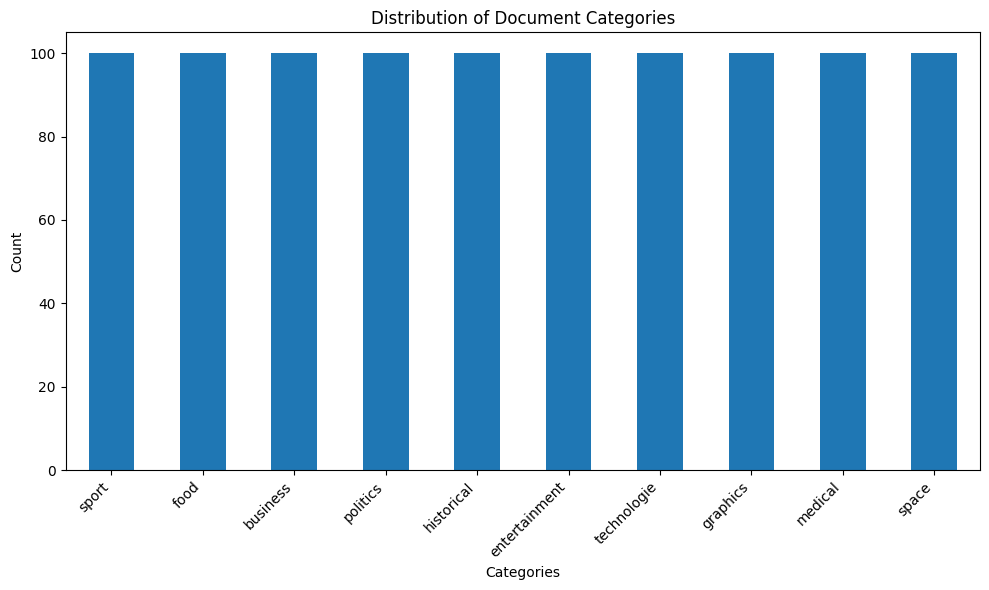

In [5]:
# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Plot histogram
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Document Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Choose a random document to summarize

In [119]:
doc = df[df.label == 'food']['text'].sample(random_state=10)

In [120]:
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

In [121]:
print(wrap(doc.iloc[0]))

Archive-name: space/controversy
Last-modified: $Date: 93/04/01
14:39:06 $
    These issues periodically come up with much argument
and few facts being
    offered.  The summaries below attempt to
represent the position on which
    much of the net community has
settled.  Please DON'T bring them up again
    unless there's
something truly new to be discussed.  The net can't set
    public
policy, that's what your representatives are for.
    Despite a
widespread belief to the contrary, the Saturn V blueprints
    have
not been lost.  They are kept at Marshall Space Flight Center on
microfilm.
    The problem in re-creating the Saturn V is not finding
the drawings, it
    is finding vendors who can supply mid-1960's
vintage hardware (like
    guidance system components), and the fact
that the launch pads and VAB
    have been converted to Space Shuttle
use, so you have no place to launch
    from.
    By the time you
redesign to accommodate available hardware and re-modify
    the
launch

Tokenize the document into sentences

In [126]:
sentences = nltk.sent_tokenize(doc.iloc[0].split("\n", 1)[1])

In [127]:
sentences

['Last-modified: $Date: 93/04/01 14:39:06 $\n    These issues periodically come up with much argument and few facts being\n    offered.',
 'The summaries below attempt to represent the position on which\n    much of the net community has settled.',
 "Please DON'T bring them up again\n    unless there's something truly new to be discussed.",
 "The net can't set\n    public policy, that's what your representatives are for.",
 'Despite a widespread belief to the contrary, the Saturn V blueprints\n    have not been lost.',
 'They are kept at Marshall Space Flight Center on\n    microfilm.',
 "The problem in re-creating the Saturn V is not finding the drawings, it\n    is finding vendors who can supply mid-1960's vintage hardware (like\n    guidance system components), and the fact that the launch pads and VAB\n    have been converted to Space Shuttle use, so you have no place to launch\n    from.",
 'By the time you redesign to accommodate available hardware and re-modify\n    the launch p

Calculate each sentence's TF-IDF score by computing the average TF-IDF score of every word in a sentece. Sentences are treated as documents and words as terms.

In [128]:
vectorizer = TfidfVectorizer(
    stop_words=stopwords.words('english'),
    norm='l1',
)

In [129]:
X = vectorizer.fit_transform(sentences) # sentences x terms

In [142]:
scores = np.zeros(len(sentences))
for i in range(len(sentences)):
  current = X[i,:] # current sentence
  score = current[current != 0].mean()
  scores[i] = score

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_base.py:645: RuntimeWarning: divide by zero encountered in divide
  return self.astype(np.float_)._mul_scalar(1./other)


Summarize based on TF-IDF scoring threshold

In [143]:
threshold = .08

for i in range(len(sentences)):
  if scores[i]>=threshold:
    print(wrap("%.3f: %s" % (scores[i], sentences[i])))

0.125: The summaries below attempt to represent the position on which
much of the net community has settled.
0.143: Please DON'T bring them up again
    unless there's something
truly new to be discussed.
0.200: The net can't set
    public policy, that's what your
representatives are for.
0.143: Despite a widespread belief to the contrary, the Saturn V
blueprints
    have not been lost.
0.167: They are kept at Marshall Space Flight Center on
    microfilm.
0.125: However, NASA frequently
    releases examples (in non-digital
form, e.g.
0.250: photos) to the public early
    in a mission.
0.200: The fuel was recovered after 5 months
    with no release of
plutonium.
0.111: (Both magazines are published by pro-space
    organizations,
the Planetary Society and the National Space Society
respectively.)
0.100: NUS Corporation, Safety Status Report for the Ulysses Mission:
Risk
    Analysis (Book 1).
0.111: Document number is NUS 5235; there is no GPO #;
    published
Jan 31, 1990.
0.091: 

Summarize displaying N highest-scoring sentences

In [145]:
# Number of sentences to display in summarization
N = 14

sort_idx = np.argsort(-scores)
for i in np.sort(sort_idx[0:N]):
  print(wrap("%.3f: %s" % (scores[i], sentences[i])))

0.250: photos) to the public early
    in a mission.
1.000: You do not explode.
0.500: Your blood does not boil.
1.000: You do
    not freeze.
0.333: You do not instantly lose consciousness.
0.500: Injuries accumulate.
0.333: The limits are not really known.
1.000: Bancroft, J.E.
0.500: $18 by mail.
0.333: 1926-1933, 1987.
1.000: 43 no.
0.250: 5 (May 1990), p.209-216.
1.000: 43 no.
0.250: 5 (May 1990), p.  203-208.


In [ ]:
Create a Summarization Function

In [146]:
def summarize_w_threshold(sentences, scores, threshold):
  for i in range(len(sentences)):
    if scores[i]>=threshold:
      print(wrap(sentences[i]))


def summarize_w_num_of_sentences(sentences, scores, N):
    if N > len(sentences):
        print("Warning: N exceeds the number of sentences. The entire text will be summarized.")
        N = len(sentences)
    sort_idx = np.argsort(-scores)
    for i in np.sort(sort_idx[0:N]):
        print(wrap(sentences[i]))


def Text_Summarization_w_Tfidf(doc, mode=1,threshold=.05,N=2):
  # mode = 0 summarizes based on TF-IDF scoring threshold -> threshold is used
  # mode = 1 summarizes displaying the N TF-IDF highest-scoring sentences -> N is used

  # split doc into sentences
  sentences = nltk.sent_tokenize(doc.iloc[0].split("\n", 1)[1])

  # set-up vectorizer element
  vectorizer = TfidfVectorizer(
    stop_words=stopwords.words('english'),
    norm='l1')

  scores = np.zeros(len(sentences))
  for i in range(len(sentences)):
    current = X[i,:] # current sentence
    score = current[current != 0].mean()
    scores[i] = score

  if mode == 0 :
    summarize_w_threshold(sentences, scores, threshold)
  elif mode == 1 :
    summarize_w_num_of_sentences(sentences, scores, N)
  else:
    print("Please try again with mode=0 or mode=1")

Choose another document to summarize

In [153]:
doc = df[df.label == 'business']['text'].sample(random_state=120)

Summarize the new document based on TF-IDF scoring threshold

In [155]:
Text_Summarization_w_Tfidf(doc,mode=0,threshold=.097)

The London FTSE fell 0.8% while Tokyo's Nikkei 225 dropped 2.11%, its
steepest fall in three months.
G20 finance ministers said nothing about supporting the dollar, whose
slide could further jeopardise growth in Japan and Europe.
And Mr Greenspan warned Asian states could soon stop funding the US
deficit.
On Monday afternoon, the euro was close to an all-time high against
the dollar at above $1.30.
Oil pushed higher too on Monday, as investors fretted about cold
weather in the US and Europe and a potential output cut from oil
producers' group Opec, although prices had cooled by the end of the
day.
Together with a $500bn trade gap, the red ink spreading across
America's public finances is widely seen as a key factor driving the
dollar lower.
And last week US Treasury Secretary John Snow told an audience in the
UK that the policy remained unaltered.
For the US government, letting the dollar drift is a useful short-term
fix.
Similarly, Asian investment helps bridge the gap in the current


Summarize the new document displaying N highest-scoring sentences

In [156]:
Text_Summarization_w_Tfidf(doc,mode=1,N=5)

G20 finance ministers said nothing about supporting the dollar, whose
slide could further jeopardise growth in Japan and Europe.
And Mr Greenspan warned Asian states could soon stop funding the US
deficit.
Oil pushed higher too on Monday, as investors fretted about cold
weather in the US and Europe and a potential output cut from oil
producers' group Opec, although prices had cooled by the end of the
day.
And last week US Treasury Secretary John Snow told an audience in the
UK that the policy remained unaltered.
For the US government, letting the dollar drift is a useful short-term
fix.


Try a very large N

In [159]:
Text_Summarization_w_Tfidf(doc,mode=1,N=10000)


Rising oil prices and the sinking dollar hit shares on Monday after a
finance ministers' meeting and stern words from Fed chief Alan
Greenspan.
The London FTSE fell 0.8% while Tokyo's Nikkei 225 dropped 2.11%, its
steepest fall in three months.
G20 finance ministers said nothing about supporting the dollar, whose
slide could further jeopardise growth in Japan and Europe.
And Mr Greenspan warned Asian states could soon stop funding the US
deficit.
On Monday afternoon, the euro was close to an all-time high against
the dollar at above $1.30.
Oil pushed higher too on Monday, as investors fretted about cold
weather in the US and Europe and a potential output cut from oil
producers' group Opec, although prices had cooled by the end of the
day.
In London, the benchmark Brent crude price closed down 51 cents at
$44.38 a barrel, while New York light sweet crude closed down 25 cents
at $48.64 a barrel.
The slide comes as the US has been attempting to talk up the
traditional "strong dollar" pol